In [1]:
#importing required libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Loading data into dataframe

data = pd.read_csv("master.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
#Renaming the columns names for convinience

data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 
                'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [4]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
data.describe()

,year,suicide_count,population,suicide_rate,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
#checking the data for null or missing values

data.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [7]:
#dropping the HDI for year column

data = data.drop(['HDI for year'], axis = 1)
data.shape

(27820, 11)

In [8]:
#dropping the country-year for year column

data = data.drop(['country-year'], axis = 1)
data.shape

(27820, 10)

In [9]:
#dropping off any null rows (is any)

data = data.dropna()
data.shape

(27820, 10)

In [10]:
#encoding the categorical features with LabelEncoder

from sklearn.preprocessing import LabelEncoder
categorical = ['country', 'year','age_group', 'gender', 'generation']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    data[column] = le.fit_transform(data[column])

In [11]:
#creating a copy of dataset for statistical test

stat_data = data.copy()
stat_data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,107,3620833,2.96,"63,067,077,179",2309,2
27816,100,29,0,5,9,348465,2.58,"63,067,077,179",2309,5
27817,100,29,1,3,60,2762158,2.17,"63,067,077,179",2309,3
27818,100,29,0,3,44,2631600,1.67,"63,067,077,179",2309,3


In [12]:
#Checking the data type of each column

data.dtypes

country             int64
year                int64
gender              int64
age_group           int64
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita      int64
generation          int64
dtype: object

In [13]:
# Converting the column 'gdp_for_year' to float from object

data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype(float)

In [14]:
#Scaling the numerical data columns with RobustScalar

numerical = ['suicide_count', 'population', 'suicide_rate', 
              'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
data[numerical] = rc.fit_transform(data[numerical])

In [15]:
data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,-0.031250,-0.084435,0.045860,-0.182942,-0.400243,2
1,0,2,1,2,-0.070312,-0.087963,-0.050955,-0.182942,-0.400243,5
2,0,2,0,0,-0.085938,-0.101142,-0.073885,-0.182942,-0.400243,2
3,0,2,1,5,-0.187500,-0.294064,-0.089172,-0.182942,-0.400243,1
4,0,2,1,1,-0.125000,-0.112232,-0.172611,-0.182942,-0.400243,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,0.640625,2.297696,-0.192994,0.059520,-0.329631,2
27816,100,29,0,5,-0.125000,-0.058824,-0.217197,0.059520,-0.329631,5
27817,100,29,1,3,0.273438,1.679341,-0.243312,0.059520,-0.329631,3
27818,100,29,0,3,0.148438,1.585323,-0.275159,0.059520,-0.329631,3


In [16]:
# Sepratating & assigning features and target columns to X & y

y = data['suicide_rate']
X = data.drop('suicide_rate',axis=1)
X.shape, y.shape

((27820, 9), (27820,))

In [17]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22256, 9), (5564, 9))

In [18]:
#importing required libraries 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [19]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))
    rmse_train.append(round(c, 3))
    rmse_test.append(round(d, 3))

In [20]:
# KNN Regression model
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model 
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
#Checking the best parameters for the model
knn_para = knn_grid.best_params_
print(knn_para)

{'n_neighbors': 1, 'weights': 'uniform'}


In [22]:
#predicting the target value from the model for the samples
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

In [23]:
#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)


KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.812

KNN: The RMSE of the training set is: 0.0
KNN: The RMSE of the testing set is: 0.5358202421806745


In [24]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('k-Nearest Neighbors Regression', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)

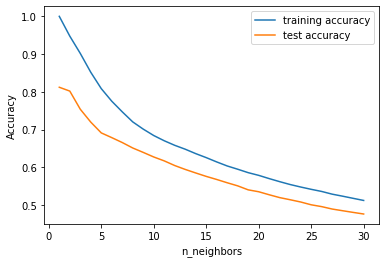

In [25]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 31)
for n in neighbors_settings:
    # fit the model
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

In [26]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [28]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.288
Linear Regression: Accuracy on test Data: 0.296

Linear Regression: The RMSE of the training set is: 1.0129029956234736
Linear Regression: The RMSE of the testing set is: 1.0369865239324312


In [29]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Linear Regression', acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr)

In [30]:
# Decision Tree regression model 
from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [31]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [32]:
#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.967
Decision Tree: Accuracy on test Data: 0.952

Decision Tree: The RMSE of the training set is: 0.21965355867472552
Decision Tree: The RMSE of the testing set is: 0.27097961623769695


In [33]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree',acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)

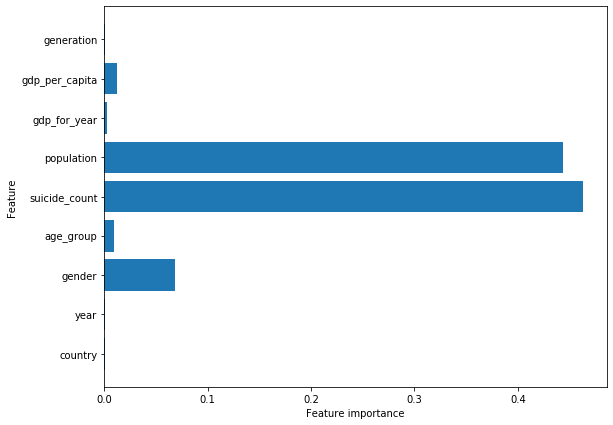

In [34]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

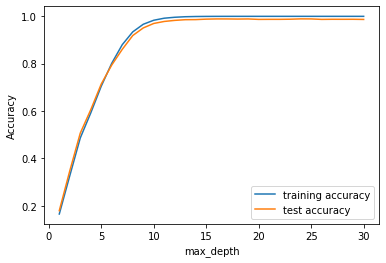

In [35]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
    # fit the model
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

In [36]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
forest = RandomForestRegressor(max_depth=9)

# fit the model 
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [38]:
#computing the accuracy of the model performance
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)

Random Forest: Accuracy on training Data: 0.986
Random Forest: Accuracy on test Data: 0.980

Random Forest: The RMSE of the training set is:  0.1402571674635384
Random Forest: The RMSE of the testing set is:  0.176165894408553


In [39]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest',acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

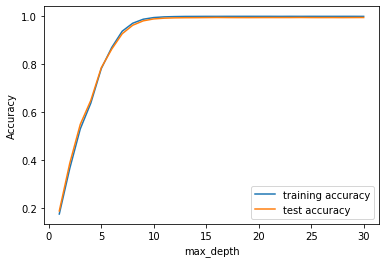

In [40]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
    # fit the model
    forest = RandomForestRegressor(max_depth=n)
    forest.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

In [41]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPRegressor

# instantiate the model
mlp = MLPRegressor(hidden_layer_sizes=([100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[100, 100], learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [42]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [43]:
#computing the accuracy of the model performance
acc_train_mlp = mlp.score(X_train, y_train)
acc_test_mlp = mlp.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_train_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_test_mlp))

print("Multilayer Perceptron Regression: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptron Regression: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print('\nMultilayer Perceptron Regression: The RMSE of the training set is: ', rmse_train_mlp)
print('Multilayer Perceptron Regression: The RMSE of the testing set is: ', rmse_test_mlp)

Multilayer Perceptron Regression: Accuracy on training Data: 0.891
Multilayer Perceptron Regression: Accuracy on test Data: 0.892

Multilayer Perceptron Regression: The RMSE of the training set is:  0.3958114254378974
Multilayer Perceptron Regression: The RMSE of the testing set is:  0.4059474120242412


In [44]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptron Regression',acc_train_mlp, acc_test_mlp, rmse_train_mlp, rmse_test_mlp)

In [45]:
#XGBoost Regression model
from xgboost import XGBRegressor

# instantiate the model
xgb = XGBRegressor(learning_rate=0.2,max_depth=4)
#fit the model
xgb.fit(X_train, y_train)

[01:17:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [46]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [47]:
#computing the accuracy of the model performance
acc_train_xgb = xgb.score(X_train, y_train)
acc_test_xgb = xgb.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_xgb))

print("XGBoost Regression: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Regression: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print('\nXGBoost Regression: The RMSE of the training set is: ', rmse_train_xgb)
print('XGBoost Regression: The RMSE of the testing set is: ', rmse_test_xgb)

XGBoost Regression: Accuracy on training Data: 0.993
XGBoost Regression: Accuracy on test Data: 0.988

XGBoost Regression: The RMSE of the training set is:  0.09961280401594837
XGBoost Regression: The RMSE of the testing set is:  0.13387205642051989


In [48]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost Regression',acc_train_xgb, acc_test_xgb, rmse_train_xgb, rmse_test_xgb)

In [49]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

In [50]:
results

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,k-Nearest Neighbors Regression,1.000,0.812,0.000,0.536
1,Linear Regression,0.288,0.296,1.013,1.037
2,Decision Tree,0.967,0.952,0.220,0.271
3,Random Forest,0.986,0.980,0.140,0.176
4,Multilayer Perceptron Regression,0.891,0.892,0.396,0.406
5,XGBoost Regression,0.993,0.988,0.100,0.134


In [51]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
5,XGBoost Regression,0.993,0.988,0.100,0.134
3,Random Forest,0.986,0.980,0.140,0.176
2,Decision Tree,0.967,0.952,0.220,0.271
4,Multilayer Perceptron Regression,0.891,0.892,0.396,0.406
0,k-Nearest Neighbors Regression,1.000,0.812,0.000,0.536
1,Linear Regression,0.288,0.296,1.013,1.037
